### Compare Phase 2+3 vs. Phase 3 only
/data/fullbody_filtered vs /data/fullbody_filtered_with_phase2

This section compares the images in `/data/fullbody_filtered` (phase 3 only) and `/data/fullbody_filtered_with_phase2` (wPhase 2+3).

In [1]:
import os

fullbody_dir = '../data/fullbody_filtered'
phase2_dir = '../data/fullbody_filtered_with_phase2'

fullbody_images = sorted([f for f in os.listdir(fullbody_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])
phase2_images = sorted([f for f in os.listdir(phase2_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])

print(f"Images in /data/fullbody_filtered: {len(fullbody_images)}")
print(f"Images in /data/fullbody_filtered_with_phase2: {len(phase2_images)}")

Images in /data/fullbody_filtered: 227
Images in /data/fullbody_filtered_with_phase2: 201


In [3]:
# Find common and unique images
common_images = set(fullbody_images) & set(phase2_images)
unique_fullbody = set(fullbody_images) - set(phase2_images)
unique_phase2 = set(phase2_images) - set(fullbody_images)

print(f"Common images: {len(common_images)}")
print(f"Unique to /data/fullbody_filtered: {len(unique_fullbody)}")
print(f"Unique to /data/fullbody_filtered_with_phase2: {len(unique_phase2)}")

Common images: 201
Unique to /data/fullbody_filtered: 26
Unique to /data/fullbody_filtered_with_phase2: 0


### Visualize Images Unique to /data/fullbody_filtered (phase 3 only)
Display sample images that are only present in `/data/fullbody_filtered` and not in `/data/fullbody_filtered_with_phase2`.

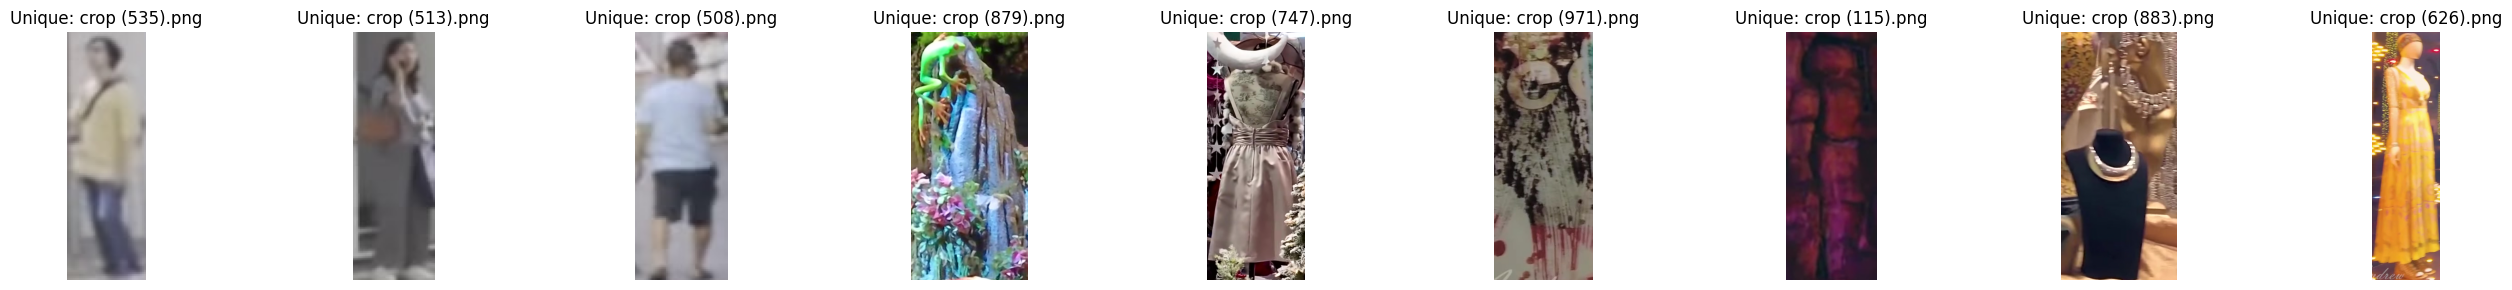

In [8]:
num_samples = min(9, len(unique_fullbody))
sample_unique = list(unique_fullbody)[:num_samples]

fig, axes = plt.subplots(1, num_samples, figsize=(3*num_samples, 3))
for i, img_name in enumerate(sample_unique):
    img = Image.open(os.path.join(fullbody_dir, img_name))
    axes[i].imshow(img)
    axes[i].set_title(f"Unique: {img_name}")
    axes[i].axis('off')
plt.tight_layout()
plt.show()

# Discussion:
- with phase 2+3 (person detection + fullbody detection)
    - 21/201 false positives (FP rate: 10.45%)
    - 9 FP involves: 3 ads/cardboards,  13 mannequinns, others 5 (statues etc)
    - Performance: higher latency since 2 filters are involved.
        - Phase 2 (Person detection): 66.04s
        - Phase 3 (Full-Body): 40.81s
        - Total: 106.85s

- with phase 3 (fullbody detection only)
    - 33/227 false positives (FP rate: 14.5%)
    - 33 FP involves: 5 ads/cardboards, 22 mannequinns, others 6 (statues etc)
    - The YOLO-Pose model alone is more lenient compared to using both Phase 2+3.
    - Some images without humans such as crops (e.g., image 879) were incorrectly passed by YOLO-Pose, but would have been filtered out by the Phase 2 person detector.
    - Performance: Phase 3 (Full-Body) only: 29.90s

- Latency reduction: 106.85s → 29.90s (72% faster)
- Increase in FP rate: 10.45% → 14.5% (4.05%)

### Conclusion: 
Removing the person detector (Phase 2) increases processing speed by 72%, with only a minor increase in FP (from 4.48% to 5.29%). Manual review confirms that most FP are non-human objects, such as mannequins. 

Given the small trade-off in FP for a significant speed gain, using only pose detection (Phase 3) is justified for this pipeline.

### Suggestions for future improvements:
- Validate on a larger or more diverse dataset to ensure generalizability.